In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime


# 1. Data Collection

In [2]:


now = datetime.now()
start = datetime(now.year - 10, now.month, now.day)
end = now
ticker = 'AAPL'

df = yf.download(ticker, start, end)

df



YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200
2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600
2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600


In [3]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [4]:
#Now we need to remove this multi index column as we dont need it.

# Flatten the MultiIndex columns if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = [col[0] for col in df.columns]

In [5]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200
2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600
2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500


# 2.Data Exploration and Visualization

In [6]:
df


,Close,High,Low,Open,Volume
Date,,,,,
2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200
2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600
2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000
2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600
...,...,...,...,...,...
2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500


In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape

(2516, 5)

In [9]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [10]:
df.describe()

,Close,High,Low,Open,Volume
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,100.645905,101.653198,99.522944,100.542423,1.116822e+08
std,68.430337,69.100349,67.658701,68.341219,6.471790e+07
min,20.674534,20.978908,20.475433,20.596724,2.323470e+07
25%,37.370710,37.630392,36.970675,37.306497,6.843475e+07
50%,77.180470,77.758598,76.462634,77.070576,9.603795e+07
75%,160.147263,161.867183,157.238321,159.657939,1.361035e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [11]:
df.dtypes

Close     float64
High      float64
Low       float64
Open      float64
Volume      int64
dtype: object

In [12]:
df.reset_index(inplace=True)

In [13]:
df

,Date,Close,High,Low,Open,Volume
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600
...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700


In [14]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

Text(0, 0.5, 'Close price')

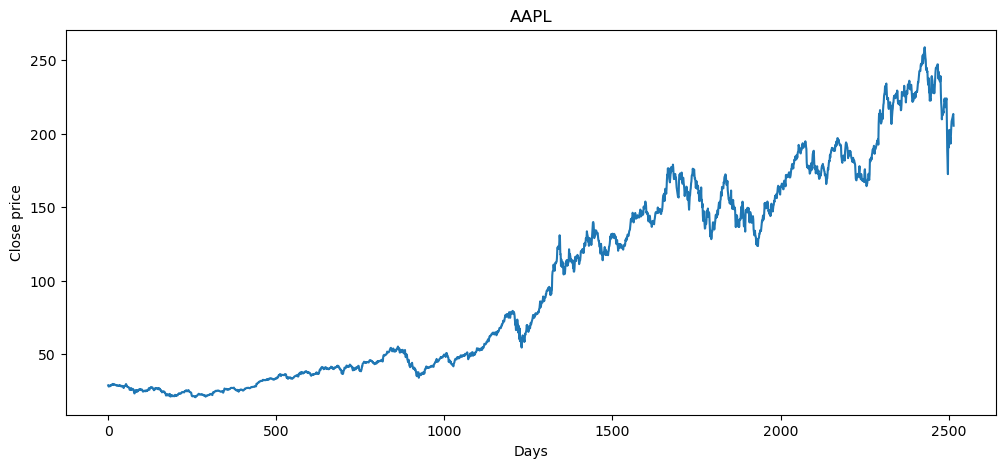

In [15]:
plt.figure(figsize=(12, 5))
plt.plot(df.index,df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

# 3.Feature Engineering

In [16]:
tempdf = pd.DataFrame([10,20,30,40,50,60,70,80,90,100])
tempdf

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [17]:
# 5days moving average
tempdf['MA_5'] = tempdf.rolling(5).mean()
tempdf


,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


### 100 Days Moving Average

In [18]:
df['MA_100'] = df.Close.rolling(100).mean()
df

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200,NaN
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600,NaN
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600,NaN
...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959


In [19]:
df.head(100)

,Date,Close,High,Low,Open,Volume,MA_100
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200,NaN
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600,NaN
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600,NaN
...,...,...,...,...,...,...,...
95,2015-09-17,25.663399,26.242357,25.618344,26.055380,256450400,NaN
96,2015-09-18,25.557518,25.749004,25.201584,25.278177,297141200,NaN
97,2015-09-21,25.954004,25.990049,25.604828,25.607080,200888000,NaN
98,2015-09-22,25.546261,25.721976,25.348017,25.541754,201384800,NaN


Text(0, 0.5, 'Price')

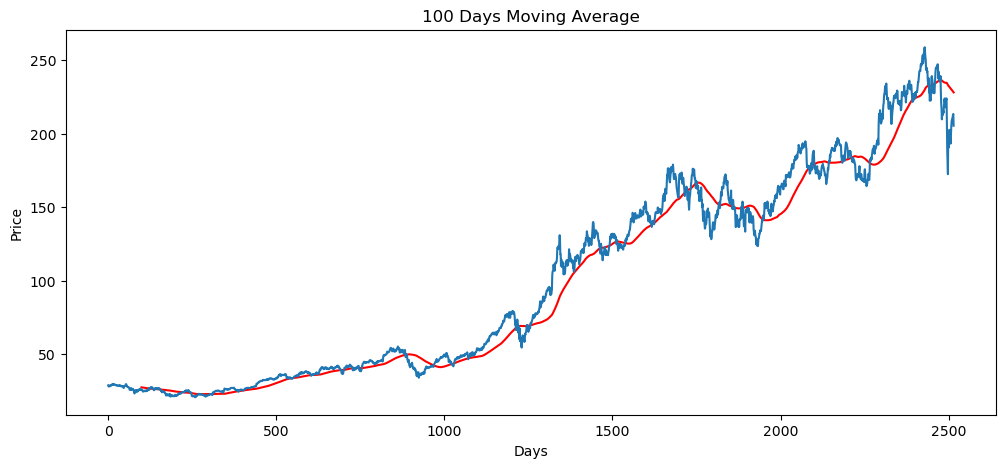

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df['MA_100'], 'r')
plt.plot(df.Close)
plt.title("100 Days Moving Average")
plt.xlabel('Days')
plt.ylabel('Price')

### 200 days Moving Average

In [21]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200,NaN,NaN
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600,NaN,NaN
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000,NaN,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-02-16,21.982462,22.030230,21.520703,21.613964,196231600,24.652619,NaN
199,2016-02-17,22.319117,22.339588,21.871005,21.989288,179452800,24.618275,26.011169
200,2016-02-18,21.896030,22.494270,21.857360,22.482895,156084000,24.578169,25.976937
201,2016-02-19,21.845989,22.009766,21.791397,21.836890,141496800,24.538215,25.945694


Text(0, 0.5, 'Price')

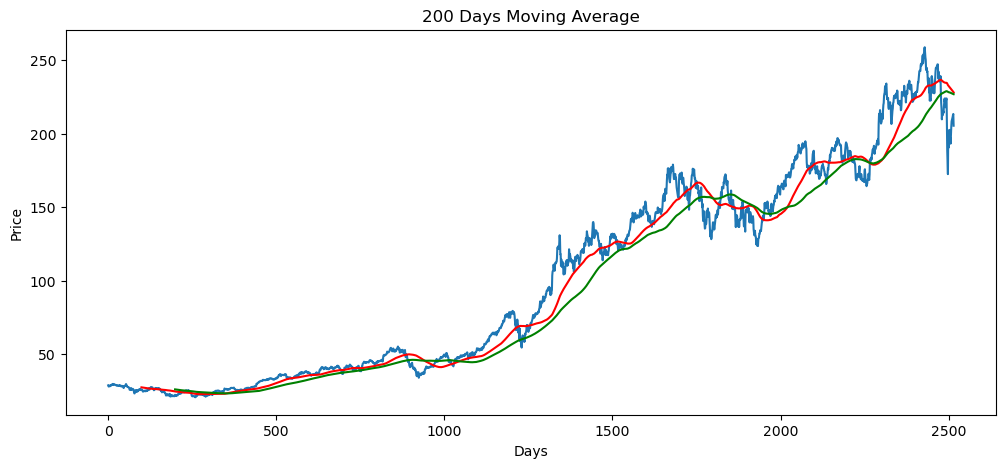

In [22]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

#### Calculating % changed in each trading session

In [23]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200,NaN,NaN
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600,NaN,NaN
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000,NaN,NaN
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600,NaN,NaN
...,...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193,227.195553
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025,227.117564
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190,227.031225
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959,226.929751


In [24]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]


,Close,Percentage Changed
0,28.742270,NaN
1,28.094627,-0.022533
2,27.918192,-0.006280
3,28.090876,0.006185
4,28.620131,0.018841
...,...,...
2511,210.139999,0.004109
2512,211.210007,0.005092
2513,212.500000,0.006108
2514,213.320007,0.003859


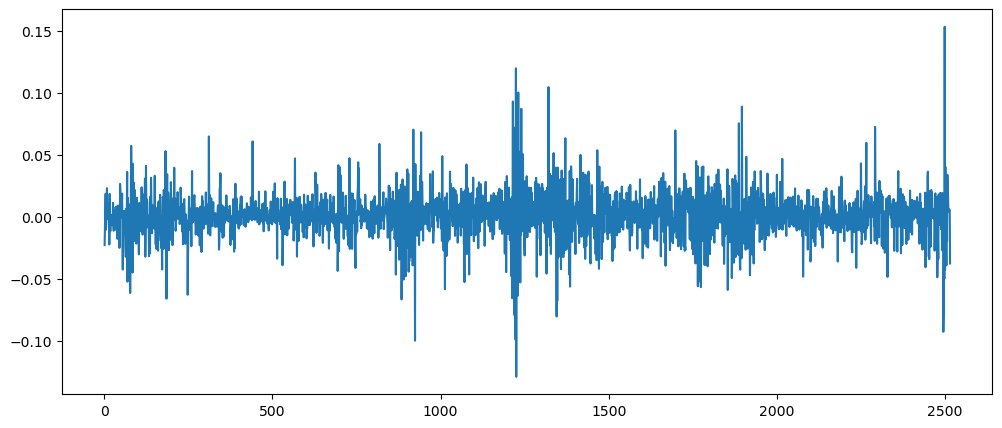

In [25]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])

In [26]:
df

,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
0,2015-05-04,28.742270,29.159895,28.644005,28.920932,203953200,NaN,NaN,NaN
1,2015-05-05,28.094627,28.686444,28.090160,28.619445,197085600,NaN,NaN,-0.022533
2,2015-05-06,27.918192,28.306782,27.549701,28.264349,288564000,NaN,NaN,-0.006280
3,2015-05-07,28.090876,28.274769,27.812791,27.980987,175763600,NaN,NaN,0.006185
4,2015-05-08,28.620131,28.620131,28.281497,28.409325,222201600,NaN,NaN,0.018841
...,...,...,...,...,...,...,...,...,...
2511,2025-04-28,210.139999,211.500000,207.460007,210.000000,38743100,229.250193,227.195553,0.004109
2512,2025-04-29,211.210007,212.240005,208.369995,208.690002,36827600,228.969025,227.117564,0.005092
2513,2025-04-30,212.500000,213.580002,206.669998,209.300003,52286500,228.670190,227.031225,0.006108
2514,2025-05-01,213.320007,214.559998,208.899994,209.080002,57365700,228.375959,226.929751,0.003859


# 4.Data Preprocessing

In [27]:
df.shape

(2516, 9)

In [28]:
# Splitting data into Training & Testing datasets
data_training = pd.DataFrame(df.Close[0 : int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])


In [29]:
data_training

,Close
0,28.742270
1,28.094627
2,27.918192
3,28.090876
4,28.620131
...,...
1756,159.210251
1757,160.282852
1758,154.299789
1759,154.073471


In [30]:
data_testing

,Close
1761,155.136246
1762,155.441315
1763,156.937057
1764,163.372757
1765,154.270279
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [31]:
# Scaling down the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:

data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05099532],
       [0.04690164],
       [0.04578641],
       ...,
       [0.84463139],
       [0.84320086],
       [0.88717707]])

In [33]:

data_training_array.shape

(1761, 1)

# 5.Sequence creation

In [34]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])


x_train, y_train = np.array(x_train), np.array(y_train)

In [35]:
x_train

array([[[0.05099532],
        [0.04690164],
        [0.04578641],
        ...,
        [0.03337099],
        [0.03079368],
        [0.03210368]],

       [[0.04690164],
        [0.04578641],
        [0.04687793],
        ...,
        [0.03079368],
        [0.03210368],
        [0.033072  ]],

       [[0.04578641],
        [0.04687793],
        [0.05022329],
        ...,
        [0.03210368],
        [0.033072  ],
        [0.03265899]],

       ...,

       [[0.89290162],
        [0.88662741],
        [0.87469992],
        ...,
        [0.90446897],
        [0.87566991],
        [0.88244971]],

       [[0.88662741],
        [0.87469992],
        [0.89631824],
        ...,
        [0.87566991],
        [0.88244971],
        [0.84463139]],

       [[0.87469992],
        [0.89631824],
        [0.93272184],
        ...,
        [0.88244971],
        [0.84463139],
        [0.84320086]]])

In [36]:
x_train.shape

(1661, 100, 1)

In [37]:
y_train.shape

(1661,)

# 6.Model Building

In [38]:

import tensorflow as tf
print(tf.__version__)

2.19.0


In [39]:

# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [40]:

model = Sequential()

model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7.Model Training

In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.0354
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 4.4257e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.9324e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 77ms/step - loss: 4.0767e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 4.3850e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 3.8233e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - loss: 3.4714e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - loss: 4.6757e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 3.3480e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 86ms/step - loss: 4.0356e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 3.6996e-04 
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 3.3175e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 76ms/step - loss: 3.1916e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 2.8093e-04 
Epoch 15/50
52/52

In [42]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:

# Save the trained model
model.save('stock_prediction_model.keras')

# 8.Preparing the Test data

In [44]:
data_testing

,Close
1761,155.136246
1762,155.441315
1763,156.937057
1764,163.372757
1765,154.270279
...,...
2511,210.139999
2512,211.210007
2513,212.500000
2514,213.320007


In [45]:
data_training.tail(100)

,Close
1661,162.476929
1662,168.236176
1663,172.069061
1664,171.558029
1665,176.363953
...,...
1756,159.210251
1757,160.282852
1758,154.299789
1759,154.073471


In [46]:

past_100_days = data_training.tail(100)

In [47]:

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

,Close
0,162.476929
1,168.236176
2,172.069061
3,171.558029
4,176.363953
...,...
850,210.139999
851,211.210007
852,212.500000
853,213.320007


In [48]:

input_data = scaler.fit_transform(final_df)
# input_data

In [49]:

input_data.shape

(855, 1)

In [50]:

x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])


In [51]:

x_test, y_test = np.array(x_test), np.array(y_test)

In [52]:
x_test[0].shape

(100, 1)

In [53]:

x_test

array([[[0.28777756],
        [0.33039054],
        [0.35875027],
        ...,
        [0.22727446],
        [0.22559992],
        [0.27707718]],

       [[0.33039054],
        [0.35875027],
        [0.35496912],
        ...,
        [0.22559992],
        [0.27707718],
        [0.23346345]],

       [[0.35875027],
        [0.35496912],
        [0.39052841],
        ...,
        [0.27707718],
        [0.23346345],
        [0.23572067]],

       ...,

       [[0.87901062],
        [0.88167135],
        [0.88189309],
        ...,
        [0.63407602],
        [0.64043921],
        [0.64835626]],

       [[0.88167135],
        [0.88189309],
        [0.88041488],
        ...,
        [0.64043921],
        [0.64835626],
        [0.65790099]],

       [[0.88189309],
        [0.88041488],
        [0.90931349],
        ...,
        [0.64835626],
        [0.65790099],
        [0.66396827]]])

## 9.Making Predictions

In [54]:

y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step 


In [55]:
y_predicted

array([[0.25488317],
       [0.25213212],
       [0.24789499],
       [0.24989553],
       [0.27372098],
       [0.26264128],
       [0.25024325],
       [0.22581121],
       [0.21651709],
       [0.19031546],
       [0.15993108],
       [0.15386775],
       [0.15201043],
       [0.16307935],
       [0.14974809],
       [0.1257874 ],
       [0.1085158 ],
       [0.11367229],
       [0.11601602],
       [0.11743256],
       [0.12687811],
       [0.15149899],
       [0.16943718],
       [0.17813776],
       [0.18776023],
       [0.17617632],
       [0.1654101 ],
       [0.16617964],
       [0.16759466],
       [0.15358031],
       [0.12590405],
       [0.09167103],
       [0.07079525],
       [0.06735688],
       [0.05712685],
       [0.05233455],
       [0.06116285],
       [0.07019317],
       [0.08373696],
       [0.10289674],
       [0.11717152],
       [0.11335605],
       [0.10997804],
       [0.1009184 ],
       [0.09912024],
       [0.1069344 ],
       [0.11863798],
       [0.136

In [56]:

y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

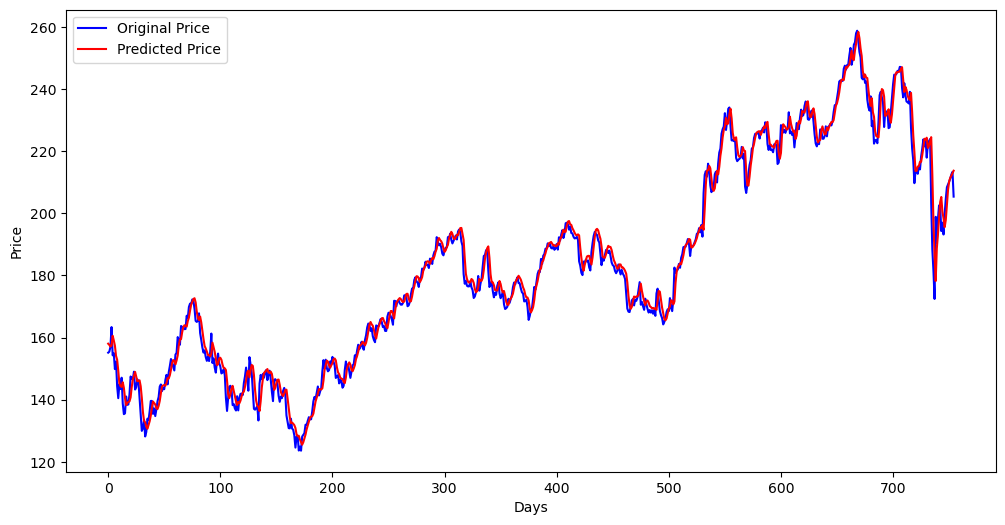

In [57]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()


(160.0, 260.0)

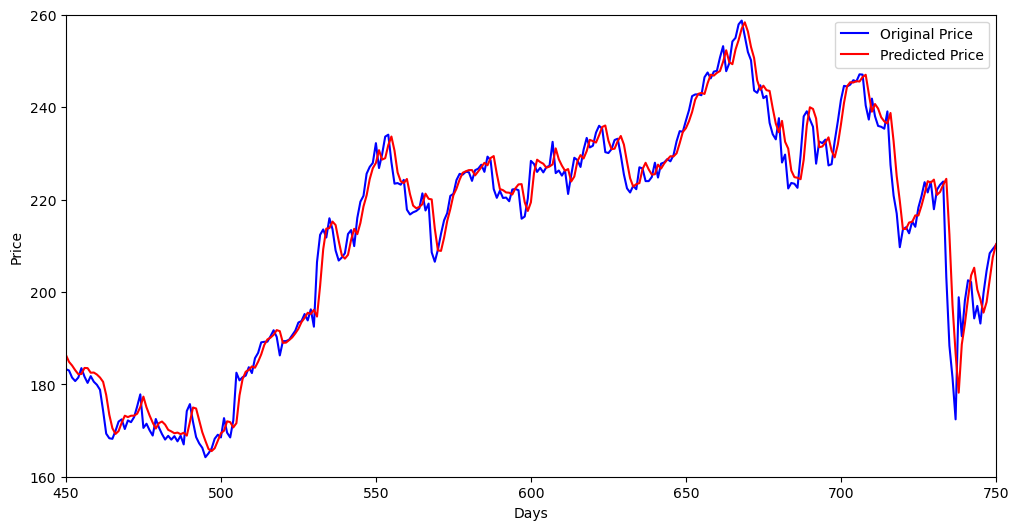

In [58]:

plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(160, 260)

# 10.Model Evaluation

In [59]:

# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score


In [60]:

mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 14.299928970794216


In [61]:

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 3.7815246886400486


In [62]:

# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9868098726973182


In [63]:
!pip install tensorflow

In [71]:
# --- Predict the next day's price using the last 100 days ---

import numpy as np
from keras.models import load_model  # <-- Fixed import

# Use the last 100 days from the final dataframe used in testing
latest_100 = final_df.tail(100).values

# Scale the data using the same scaler used during training
latest_100_scaled = scaler.transform(latest_100)

# Prepare input for the model
X_input = []
X_input.append(latest_100_scaled)
X_input = np.array(X_input)
X_input = X_input.reshape((1, 100, 1))

# Load the model and make prediction
model = load_model('stock_prediction_model.keras')
predicted_price = model.predict(X_input)

# Inverse transform to get actual price
predicted_price = scaler.inverse_transform(predicted_price)
print(f"Predicted next price: {predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Predicted next price: 209.55


In [72]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import datetime

# --- Load your trained model ---
model = load_model('stock_prediction_model.keras')  # Change if your model filename is different

# --- Fetch latest stock data ---
ticker = "AAPL"  # You can change to any valid stock symbol
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=150)  # Fetch more than 100 days to be safe

data = yf.download(ticker, start=start_date, end=end_date)
close_data = data['Close'].values.reshape(-1, 1)

# --- Scale the data just like you did for training ---
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_data)

# --- Prepare last 100 days as input ---
latest_100 = scaled_data[-100:]  # Last 100 values
X_input = latest_100.reshape(1, 100, 1)

# --- Predict ---
predicted_price = model.predict(X_input)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted next closing price for {ticker}: ${predicted_price[0][0]:.2f}")


[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Predicted next closing price for AAPL: $209.55
